Normal import and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
os.listdir('Data')

['test', 'train', 'train.csv']

In [3]:
train_images_path = os.path.abspath('Data/train')
test_images_path = os.path.abspath('Data/test')
train_targets_path = os.path.abspath('Data/train.csv')
out_images_path = os.path.abspath('Resized')

In [4]:
dataframe = pd.read_csv(train_targets_path)

In [5]:
dataframe.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [6]:
dataframe.shape

(25361, 2)

In [7]:
dataframe['Image_path'] = [os.path.join(train_images_path,whale) for whale in dataframe['Image']]

In [8]:
dataframe['Image_path'].head()

0    E:\MLProject\Intercontinent\Data\train\0000e88...
1    E:\MLProject\Intercontinent\Data\train\0001f92...
2    E:\MLProject\Intercontinent\Data\train\00029d1...
3    E:\MLProject\Intercontinent\Data\train\00050a1...
4    E:\MLProject\Intercontinent\Data\train\0005c1e...
Name: Image_path, dtype: object

This patch of code is an attempt conver to grayscale and then resampling image at a lower scale. Result is shown in folder rescaled. <br>
Maybe because I went from 1050 columns down to 100 columns so not every features are reserve. But a larger number like 500 would do and also it helps reduce input nodes into our NN. <br>
I feel that resampling while still keep the image aspect ratio and then crop or zero padding is better than just straight up do resize image, which would compress the image and lose some features.<br>
Also note that pics in the dataset have different aspect ratio.

In [9]:
for whale in dataframe['Image']:
    image_path = os.path.join(train_images_path,whale)
    im=cv2.imread(image_path)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #convert to gray scale
    r = 100.0 / im_gray.shape[1] #calculate number of multipliers
    dim = (100, int(im_gray.shape[0] * r)) #100 is number of desire column, variable after that is # of row 
    resized = cv2.resize(im_gray, dim, interpolation = cv2.INTER_AREA)
    ret = cv2.imwrite(os.path.join(out_image_path,whale),resized)
    print(ret)

Original Image

(700, 1050, 3)


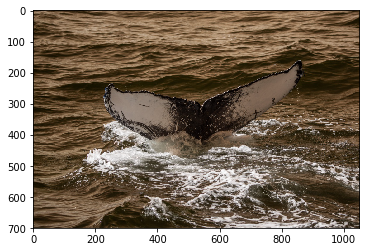

In [10]:
im = cv2.imread(dataframe['Image_path'][0])
plt.imshow(im)
print(im.shape)

After resizing

(66, 100)


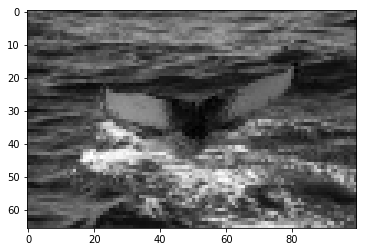

In [11]:
image_path = os.path.join(out_images_path,dataframe['Image'][0])
im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap='gray')
print(im.shape)

Count of each Label

In [12]:
count_hash = dict()
for whale_id in dataframe['Id']:
    if (whale_id in count_hash):
        count_hash[whale_id]+=1;
    else:
        count_hash[whale_id]=1;

In [13]:
count_hash

{'w_f48451c': 14,
 'w_c3d896a': 4,
 'w_20df2c5': 4,
 'new_whale': 9664,
 'w_dd88965': 16,
 'w_64404ac': 5,
 'w_a6f9d33': 2,
 'w_581ba42': 14,
 'w_cb622a2': 5,
 'w_d3b46e7': 2,
 'w_8cad422': 6,
 'w_13ae3d4': 3,
 'w_3de579a': 54,
 'w_1d0830e': 11,
 'w_2ba6978': 2,
 'w_8dddbee': 2,
 'w_2365d55': 29,
 'w_3879fa0': 17,
 'w_9c506f6': 62,
 'w_8a6a8d5': 17,
 'w_662530e': 9,
 'w_a8b34a0': 16,
 'w_c0d11da': 15,
 'w_50e8d58': 7,
 'w_3881f28': 2,
 'w_9ad3551': 4,
 'w_cee684e': 3,
 'w_41d24c6': 7,
 'w_8a235b6': 2,
 'w_2e231f4': 3,
 'w_6822dbc': 36,
 'w_df86a42': 4,
 'w_700ebb4': 57,
 'w_d892cd9': 8,
 'w_7a4b2f9': 2,
 'w_bc285a6': 21,
 'w_c70fbcd': 3,
 'w_778e474': 40,
 'w_f3252ff': 6,
 'w_2df85e7': 16,
 'w_c7cda47': 2,
 'w_62bb54b': 1,
 'w_c6c89db': 6,
 'w_1531bf5': 6,
 'w_4e1e04d': 2,
 'w_d6ca28d': 3,
 'w_1260eb5': 5,
 'w_fccccec': 14,
 'w_acd217a': 2,
 'w_5650932': 10,
 'w_c98aaad': 4,
 'w_dd944b7': 11,
 'w_6f0cbe3': 11,
 'w_6cfa650': 8,
 'w_6e209a8': 13,
 'w_1ea5d96': 2,
 'w_914b110': 5,
 'w_bf3

Percentage of each label. New_whale is the majority. Data is pretty skewed toward new_whale. So I think it would be better to just remove it. Or we can do first classification new_whale vs not-new_whale. Then do classification on not-new_whale.

In [14]:
for i in count_hash:
    count_hash[i] = count_hash[i] / 25361 * 100
    print("{} : {}".format(i, round(count_hash[i],3)), end='\n')

w_f48451c : 0.055
w_c3d896a : 0.016
w_20df2c5 : 0.016
new_whale : 38.106
w_dd88965 : 0.063
w_64404ac : 0.02
w_a6f9d33 : 0.008
w_581ba42 : 0.055
w_cb622a2 : 0.02
w_d3b46e7 : 0.008
w_8cad422 : 0.024
w_13ae3d4 : 0.012
w_3de579a : 0.213
w_1d0830e : 0.043
w_2ba6978 : 0.008
w_8dddbee : 0.008
w_2365d55 : 0.114
w_3879fa0 : 0.067
w_9c506f6 : 0.244
w_8a6a8d5 : 0.067
w_662530e : 0.035
w_a8b34a0 : 0.063
w_c0d11da : 0.059
w_50e8d58 : 0.028
w_3881f28 : 0.008
w_9ad3551 : 0.016
w_cee684e : 0.012
w_41d24c6 : 0.028
w_8a235b6 : 0.008
w_2e231f4 : 0.012
w_6822dbc : 0.142
w_df86a42 : 0.016
w_700ebb4 : 0.225
w_d892cd9 : 0.032
w_7a4b2f9 : 0.008
w_bc285a6 : 0.083
w_c70fbcd : 0.012
w_778e474 : 0.158
w_f3252ff : 0.024
w_2df85e7 : 0.063
w_c7cda47 : 0.008
w_62bb54b : 0.004
w_c6c89db : 0.024
w_1531bf5 : 0.024
w_4e1e04d : 0.008
w_d6ca28d : 0.012
w_1260eb5 : 0.02
w_fccccec : 0.055
w_acd217a : 0.008
w_5650932 : 0.039
w_c98aaad : 0.016
w_dd944b7 : 0.043
w_6f0cbe3 : 0.043
w_6cfa650 : 0.032
w_6e209a8 : 0.051
w_1ea5d96 : 

w_8cbe62a : 0.008
w_9adf29b : 0.008
w_2812e0d : 0.012
w_5390260 : 0.012
w_28218e1 : 0.028
w_12cc52d : 0.067
w_26923f7 : 0.004
w_06619ff : 0.008
w_264c2e1 : 0.008
w_a8d89df : 0.016
w_f3b6937 : 0.004
w_3209f9e : 0.008
w_8b943ef : 0.008
w_81aa796 : 0.004
w_ebfbdda : 0.004
w_0ad1734 : 0.004
w_f91aeec : 0.008
w_966f46a : 0.012
w_3bf2653 : 0.035
w_bef0a5d : 0.02
w_36bbd71 : 0.067
w_8f65356 : 0.004
w_b524f96 : 0.012
w_8cfabed : 0.024
w_cd2d796 : 0.004
w_ec98537 : 0.016
w_cded134 : 0.008
w_b48de8c : 0.008
w_4801beb : 0.02
w_9f2cfff : 0.012
w_491bdcb : 0.004
w_e19a641 : 0.032
w_588f349 : 0.016
w_7122684 : 0.008
w_955bfe2 : 0.039
w_1932830 : 0.008
w_68eaf36 : 0.024
w_abd456f : 0.016
w_b3cc7b3 : 0.043
w_3f213d5 : 0.004
w_c6b05f1 : 0.008
w_ae8982d : 0.047
w_9287505 : 0.016
w_0887d9b : 0.055
w_6fce84d : 0.032
w_ab7c369 : 0.079
w_d2b7856 : 0.004
w_a6d6964 : 0.012
w_5a2634c : 0.146
w_9d86594 : 0.063
w_0714a46 : 0.012
w_57db059 : 0.039
w_e27bbf6 : 0.075
w_98cc97d : 0.016
w_98a87a6 : 0.008
w_84c23bb : 

w_6b1bd76 : 0.016
w_bd80cf2 : 0.004
w_636aa5b : 0.004
w_953b7b2 : 0.008
w_2f87cc7 : 0.016
w_7a8ce16 : 0.024
w_210caac : 0.008
w_5c2c1a1 : 0.008
w_b3e445e : 0.039
w_51a0ec9 : 0.012
w_8eae2c3 : 0.024
w_13e8097 : 0.004
w_9660cec : 0.012
w_ff6065f : 0.004
w_a90164b : 0.012
w_e0ed636 : 0.008
w_35756a2 : 0.004
w_d307d9d : 0.016
w_a386d0b : 0.008
w_6bee56d : 0.004
w_1e81b43 : 0.004
w_1ea8997 : 0.012
w_a3eaca5 : 0.004
w_e897a60 : 0.024
w_1b00c27 : 0.004
w_9aa9809 : 0.012
w_ebad318 : 0.004
w_bdb0a25 : 0.004
w_b570fe1 : 0.004
w_2a7c1af : 0.008
w_1de6148 : 0.012
w_8d52508 : 0.004
w_0a0c768 : 0.012
w_1344da3 : 0.008
w_705e466 : 0.004
w_f449c3d : 0.004
w_04f5f55 : 0.012
w_deda5f7 : 0.008
w_decafbd : 0.028
w_5af3b0a : 0.004
w_754cc34 : 0.008
w_513f024 : 0.008
w_ad88c85 : 0.012
w_ae83866 : 0.004
w_a49508b : 0.004
w_5ad70f3 : 0.008
w_d74498b : 0.008
w_0dc84fd : 0.012
w_bdf9612 : 0.004
w_114a297 : 0.008
w_ff5fc91 : 0.008
w_0a31a3a : 0.02
w_34941d8 : 0.004
w_1b04c3c : 0.004
w_4a0c2a7 : 0.008
w_c536a4a :

w_fdfd867 : 0.004
w_5234c83 : 0.004
w_68ef337 : 0.004
w_52adbfa : 0.008
w_83e0076 : 0.012
w_1693b27 : 0.008
w_725bf15 : 0.004
w_5877e51 : 0.008
w_e709b7d : 0.008
w_73e5b74 : 0.004
w_f94d9bb : 0.004
w_c80541e : 0.012
w_19fb122 : 0.008
w_fd0d9a2 : 0.008
w_5cc8711 : 0.008
w_99f608a : 0.008
w_f08d3f7 : 0.004
w_db491c8 : 0.004
w_5e2589b : 0.012
w_1104cca : 0.008
w_2ac6611 : 0.004
w_2d3ef19 : 0.004
w_1574bd1 : 0.008
w_9fb95f6 : 0.008
w_5a8902d : 0.012
w_96dd362 : 0.004
w_59fb9d2 : 0.004
w_44fc980 : 0.008
w_d44dfdc : 0.004
w_a8b65e2 : 0.008
w_60f4a66 : 0.008
w_a94ea72 : 0.004
w_277d911 : 0.004
w_398323d : 0.004
w_23ce00e : 0.035
w_00d5466 : 0.004
w_b5e6c9c : 0.024
w_21b3c7e : 0.008
w_6db266a : 0.004
w_cf18ab7 : 0.004
w_190375b : 0.012
w_571cf6d : 0.004
w_0d145d4 : 0.012
w_82479e4 : 0.008
w_f6bae1a : 0.004
w_2757c07 : 0.004
w_f11cbbc : 0.004
w_7d46ac3 : 0.008
w_3bfa4f8 : 0.004
w_a763725 : 0.004
w_a7757d4 : 0.008
w_1b1dd05 : 0.008
w_d06e2d0 : 0.004
w_122e247 : 0.012
w_5f0fcab : 0.008
w_68a89b5 

w_1d2ed91 : 0.004
w_d7bfad6 : 0.004
w_3bc4a4f : 0.004
w_17ba5e4 : 0.004
w_fcc8a87 : 0.004
w_c6d75ff : 0.008
w_c68b887 : 0.004
w_33eb301 : 0.004
w_a9a3878 : 0.004
w_84dbd14 : 0.004
w_02e8199 : 0.004
w_2ac2bac : 0.004
w_b95749b : 0.004
w_344f319 : 0.004
w_6579856 : 0.004
w_140a9ac : 0.004
w_d3582f2 : 0.004
w_89ad73e : 0.004
w_5037cfd : 0.004
w_658f76d : 0.004
w_c9a569d : 0.004
w_01fc429 : 0.004
w_298a035 : 0.004
w_d05fc81 : 0.004
w_0741282 : 0.004
w_a046389 : 0.004
w_4126cb1 : 0.004
w_f854d6b : 0.004
w_5fcd8d4 : 0.004
w_97d9f33 : 0.004
w_d3b48ef : 0.004
w_f10aaf0 : 0.004
w_fdd9086 : 0.004
w_1d4e949 : 0.004
w_eacf402 : 0.004
w_ab41d9b : 0.008
w_02ff6d6 : 0.008
w_122eec1 : 0.004
w_4b2e47b : 0.004
w_961b5c4 : 0.004
w_567d88c : 0.004
w_b67fcb9 : 0.004
w_628a326 : 0.004
w_41eb3b2 : 0.004
w_56fcc39 : 0.004
w_060ec6d : 0.004
w_29e5e8e : 0.004
w_14f15a0 : 0.004
w_dc9d8ae : 0.004
w_31233f8 : 0.004
w_7aa47a8 : 0.004
w_e09baaa : 0.004
w_d02f064 : 0.004
w_85d9e99 : 0.004
w_3bb142c : 0.004
w_cf35076 